In [1]:
#importing packages and libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image     

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Make a Dataset
batch_size = 32
image_size = 256
dataset = keras.preprocessing.image_dataset_from_directory(directory=os.path.join('dataset', 'PlantVillage'),
                                                           batch_size=batch_size,
                                                           image_size=(image_size, image_size),
                                                           shuffle=True)
dataset

Found 2152 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
93 * batch_size

2976

In [7]:

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)
    train_batch_count = int(dataset_batch_count * train_size)
    validation_test_batch_count = int(dataset_batch_count * validation_size)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)

    train_ds = dataset.take(train_batch_count)
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)

    return train_ds, validation_ds, test_ds

In [8]:
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

(256, 256, 3)
[[[146. 135. 141.]
  [144. 133. 139.]
  [140. 129. 135.]
  ...
  [118. 106. 110.]
  [128. 116. 120.]
  [120. 108. 112.]]

 [[133. 122. 128.]
  [137. 126. 132.]
  [142. 131. 137.]
  ...
  [118. 106. 110.]
  [130. 118. 122.]
  [120. 108. 112.]]

 [[132. 121. 127.]
  [135. 124. 130.]
  [139. 128. 134.]
  ...
  [140. 128. 132.]
  [141. 129. 133.]
  [118. 106. 110.]]

 ...

 [[166. 156. 155.]
  [167. 157. 156.]
  [165. 155. 154.]
  ...
  [173. 159. 159.]
  [141. 127. 127.]
  [174. 160. 160.]]

 [[160. 150. 149.]
  [167. 157. 156.]
  [170. 160. 159.]
  ...
  [123. 109. 109.]
  [138. 124. 124.]
  [130. 116. 116.]]

 [[159. 149. 148.]
  [171. 161. 160.]
  [176. 166. 165.]
  ...
  [132. 118. 118.]
  [182. 168. 168.]
  [156. 142. 142.]]]

(32,)
1



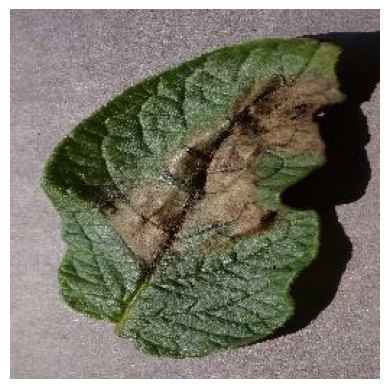

In [9]:

for image_batch, label_batch in train_ds.take(1):
    print(image_batch.numpy()[0].shape)
    print(image_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    plt.imshow(image_batch.numpy()[0].astype('uint8'))
    plt.axis('off')

In [10]:
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
channel = 3  # RGB
input_shape = (batch_size, image_size, image_size, channel)
target = 3  # len(class_names)

input_shape

(32, 256, 256, 3)

In [12]:
# Image Data Preprocessing

preprocessing = keras.Sequential([
                    keras.layers.Resizing(height=image_size, width=image_size),
                    keras.layers.Rescaling(scale=1./255),
                    keras.layers.RandomFlip(mode='horizontal_and_vertical'),
                    keras.layers.RandomRotation(factor=0.2)
                ])
preprocessing
    

<Sequential name=sequential, built=False>

In [13]:

# Build CNN Architecture

model = keras.Sequential([
            # CNN
            preprocessing,
            keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # ANN
            keras.layers.Flatten(),
            keras.layers.Dense(units=64, activation='relu'),
            keras.layers.Dense(units=target, activation='softmax')
        ])
model

<Sequential name=sequential_1, built=False>

In [14]:

model.build(input_shape)
model.summary()
     

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model
     

<Sequential name=sequential_1, built=True>

In [16]:
history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4747 - loss: 0.9280 - val_accuracy: 0.6146 - val_loss: 0.7501
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 911ms/step - accuracy: 0.6924 - loss: 0.6634 - val_accuracy: 0.7865 - val_loss: 0.4904
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 953ms/step - accuracy: 0.8537 - loss: 0.3665 - val_accuracy: 0.8958 - val_loss: 0.2342
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 937ms/step - accuracy: 0.9141 - loss: 0.2371 - val_accuracy: 0.9115 - val_loss: 0.2966
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 681ms/step - accuracy: 0.9361 - loss: 0.1914 - val_accuracy: 0.8594 - val_loss: 0.3573
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 655ms/step - accuracy: 0.9042 - loss: 0.2431 - val_accuracy: 0.9375 - val_loss: 0.1841
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 602ms/step - accuracy: 0.9581 - loss: 0.1196 - val_accuracy: 0.9740 - val_loss: 0.0790
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 585ms/step - accuracy: 0.9610 - loss: 0.1057 - val_accurac

In [17]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 1.0000 - loss: 0.0026


[0.0022487202659249306, 1.0]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
acc[0:5]

[0.5082159638404846,
 0.73591548204422,
 0.862089216709137,
 0.8978873491287231,
 0.9409722089767456]

In [20]:
len(acc), len(val_acc), len(loss), len(val_loss)

(50, 50, 50, 50)

In [21]:
model.save('model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

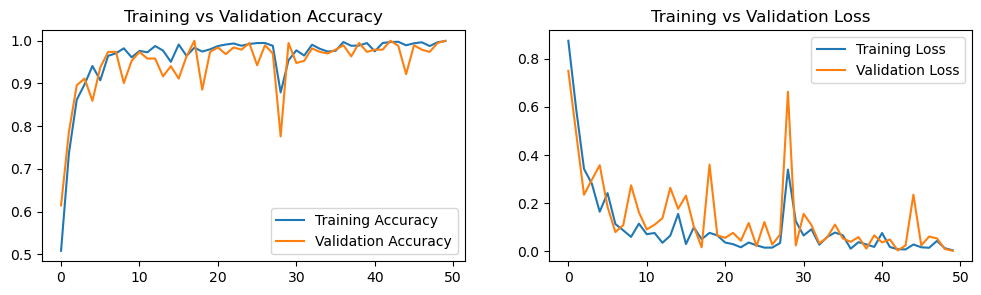

In [22]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [23]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:

def prediction(image_path, class_names = dataset.class_names):

    img = Image.open(image_path).resize((256,256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    model = tf.keras.models.load_model('model.h5')
    prediction = model.predict(img_array)

    predicted_class = class_names[np.argmax(prediction)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')
    print('')
    plt.imshow(img)
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
Predicted Class : Potato___Early_blight
Confident : 91.0%



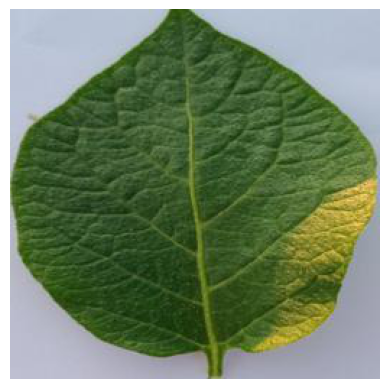

In [26]:
prediction(image_path='New folder/Healthy_27.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
Predicted Class : Potato___healthy
Confident : 95.67%



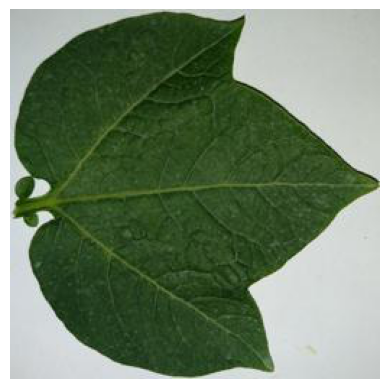

In [28]:
prediction(image_path='New folder/Healthy_21.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Predicted Class : Potato___Late_blight
Confident : 99.98%



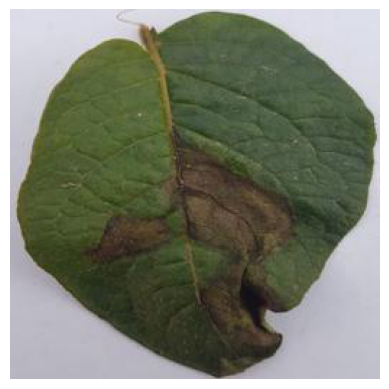

In [30]:

prediction(image_path='New folder/Late_Blight_12.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Predicted Class : Potato___Early_blight
Confident : 81.98%



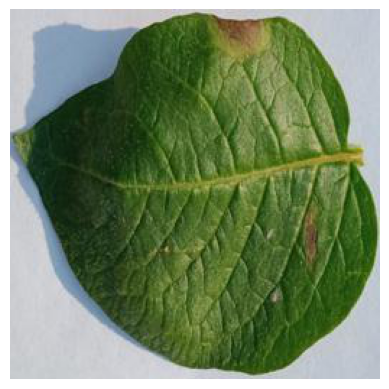

In [32]:

prediction(image_path='New folder/Late_Blight_21.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step
Predicted Class : Potato___Early_blight
Confident : 77.45%



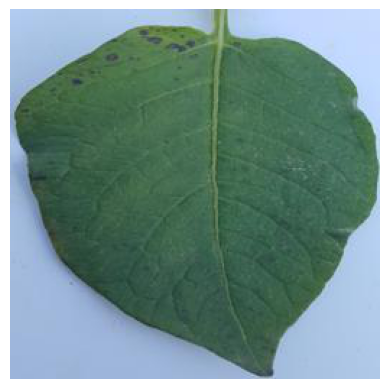

In [34]:
prediction(image_path='New folder/Early_Blight_12.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Predicted Class : Potato___Early_blight
Confident : 91.33%



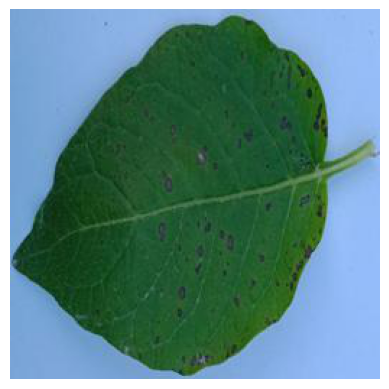

In [36]:
prediction(image_path='New folder/Early_Blight_23.jpg')